In [2]:
#https://towardsdatascience.com/social-distancing-to-slow-the-coronavirus-768292f04296
import numpy as np
import matplotlib.pyplot as plt
def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [23]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

(0, 200)

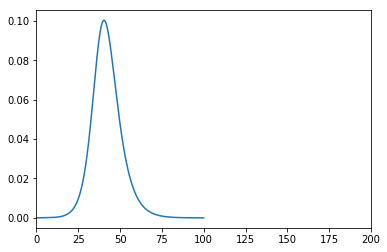

In [24]:
plt.plot(t,results[:,2])
plt.xlim(0,200)

In [3]:
def seir_model_with_soc_dist(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma, rho = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (rho*beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (rho*beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R]).T

In [25]:
# Define parameters
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho=.5
params = alpha, beta, gamma, rho
# Run simulation
results2 = seir_model_with_soc_dist(init_vals, params, t2)

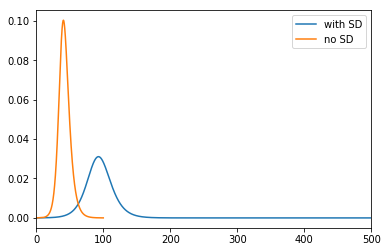

In [26]:
plt.plot(t2,results2[:,2], label = 'with SD')
plt.plot(t,results[:,2], label = 'no SD')
plt.xlim(0,500)
plt.legend()

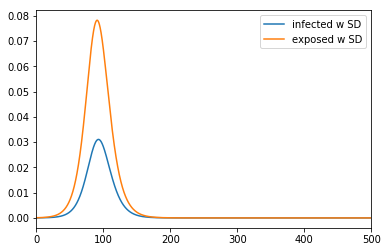

In [27]:
plt.plot(t2,results2[:,2], label = 'infected w SD')
plt.plot(t2,results2[:,1], label = 'exposed w SD')
plt.xlim(0,500)
plt.legend()

In [4]:
# Try varying the social distance parameter rho
t_max = 500
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho1=.3
rho2=.5
rho3=.8
rho4=1.
params1 = alpha, beta, gamma, rho1
params2 = alpha, beta, gamma, rho2
params3 = alpha, beta, gamma, rho3
params4 = alpha, beta, gamma, rho4
# Run simulation
curve1 = seir_model_with_soc_dist(init_vals, params1, t2)
curve2 = seir_model_with_soc_dist(init_vals, params2, t2)
curve3 = seir_model_with_soc_dist(init_vals, params3, t2)
curve4 = seir_model_with_soc_dist(init_vals, params4, t2)

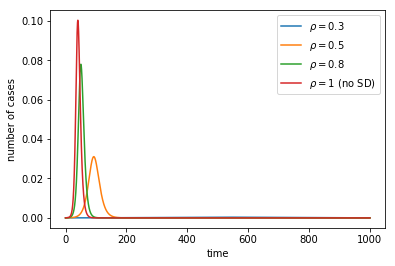

In [25]:
plt.plot(t2, curve1[:,2], label = r'$\rho = 0.3$')
plt.plot(t2, curve2[:,2], label = r'$\rho = 0.5$')
plt.plot(t2, curve3[:,2], label = r'$\rho = 0.8$')
plt.plot(t2, curve4[:,2], label = r'$\rho = 1$ (no SD)')
plt.xlabel('time')
plt.ylabel('number of cases')
plt.legend()

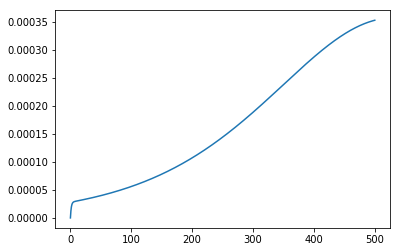

In [11]:
plt.plot(t2, curve1[:,2], label = r'$\rho = 0.3$')

In [14]:
def simpson(arrayfunc, n, xmin, xmax): #takes array of integrand values 
    array = np.linspace(xmin, xmax, n)
    integral = arrayfunc[0] + arrayfunc[-1] #initialize integral with first and last value
    #define bin size
    bins = (xmax - xmin) /n

    for i in range(len(arrayfunc) -2 ):
        if (i+1) %2. == 0.:               #even terms                                             
            integral += 4. * arrayfunc[i+1]
        else: #odd terms
            integral += 2. * arrayfunc[i+1]
    return ((bins/3.) * integral) #multiply by overall factor

In [20]:
print('for rho = .5', simpson(curve2[:,2], 5000., 0., 500.))
print('for rho = .8', simpson(curve3[:,2], 5000., 0., 500.))
print('for rho = 1', simpson(curve4[:,2], 5000., 0., 500.))

('for rho = .5', 1.4268170941132716)
('for rho = .8', 1.8517507782735938)
('for rho = 1', 1.9334923710627154)


/Users/samditkovsky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


In [21]:
# vary stepsize to test convergence
t_max = 500
dt = .01
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho1=.3
rho2=.5
rho3=.8
rho4=1.
params1 = alpha, beta, gamma, rho1
params2 = alpha, beta, gamma, rho2
params3 = alpha, beta, gamma, rho3
params4 = alpha, beta, gamma, rho4
# Run simulation
curve1 = seir_model_with_soc_dist(init_vals, params1, t2)
curve2 = seir_model_with_soc_dist(init_vals, params2, t2)
curve3 = seir_model_with_soc_dist(init_vals, params3, t2)
curve4 = seir_model_with_soc_dist(init_vals, params4, t2)

In [22]:
print('for rho = .5', simpson(curve2[:,2], 50000., 0., 500.))
print('for rho = .8', simpson(curve3[:,2], 50000., 0., 500.))
print('for rho = 1', simpson(curve4[:,2], 50000., 0., 500.))

('for rho = .5', 1.425641923684391)
('for rho = .8', 1.8501458128560764)
('for rho = 1', 1.9321282703594396)


/Users/samditkovsky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  


In [23]:
# vary limits to test convergence
t_max = 1000
dt = .1
t2 = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000.
init_vals = 1. - 1./N, 1./N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
rho1=.3
rho2=.5
rho3=.8
rho4=1.
params1 = alpha, beta, gamma, rho1
params2 = alpha, beta, gamma, rho2
params3 = alpha, beta, gamma, rho3
params4 = alpha, beta, gamma, rho4
# Run simulation
curve1 = seir_model_with_soc_dist(init_vals, params1, t2)
curve2 = seir_model_with_soc_dist(init_vals, params2, t2)
curve3 = seir_model_with_soc_dist(init_vals, params3, t2)
curve4 = seir_model_with_soc_dist(init_vals, params4, t2)

In [24]:
print('for rho = .5', simpson(curve2[:,2], 50000., 0., 500.))
print('for rho = .8', simpson(curve3[:,2], 50000., 0., 500.))
print('for rho = 1', simpson(curve4[:,2], 50000., 0., 500.))

('for rho = .5', 0.14268170941132718)
('for rho = .8', 0.1851750778273594)
('for rho = 1', 0.19334923710627155)


/Users/samditkovsky/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  
